# Confirmation Figures

This notebook contains all code and figures generated for the confirmation milestone. 

In [1]:
import os 
import DataFunctions as utils
import Visualisation as vis
from toolkit import * 
import numpy as np
import pandas as pd
### Load data

import pandas as pd
import pickle

# import GDSC2 drug response data using pickle

with open('data/drug-response/GDSC2/cache_gdsc2.pkl', 'rb') as f:
    gdsc2 = pickle.load(f)
    gdsc2_info = pickle.load(f)

# import CCLE gene expression data using pickle

with open('data/gene-expression/CCLE_Public_22Q2/ccle_expression.pkl', 'rb') as f:
    gene_entrez = pickle.load(f)
    ccle = pickle.load(f)

# import CCLE sample info data using pickle

with open('data/gene-expression/CCLE_Public_22Q2/ccle_sample_info.pkl', 'rb') as f:
    ccle_sample_info = pickle.load(f)

# import STRING database using pickle

with open('data/protein-interaction/STRING/string_df.pkl', 'rb') as f:
    string_df = pickle.load(f)
    string_df_info = pickle.load(f)
    string_df_alias = pickle.load(f)


# import proteomic expression
with open('data/proteomic-expression/goncalves-2022-cell/goncalve_proteome_processed.pkl', 'rb') as f:
    joined_full_protein_matrix = pickle.load(f)
    joined_sin_peptile_exclusion_matrix = pickle.load(f)

# import STRING database using pickle

with open('data/protein-interaction/STRING/string_df.pkl', 'rb') as f:
    string_df = pickle.load(f)
    string_df_info = pickle.load(f)
    string_df_alias = pickle.load(f)

# open STRING to goncalves mapping file

with open('data\protein-interaction\STRING\goncalve_to_string_id_df.pkl', 'rb') as f:
    goncalve_to_string_id_df = pickle.load(f)

# open the cache for neighbourhood calculations

with open('data/protein-interaction/STRING/palbociclib_nth_degree_neighbours.pkl', 'rb') as f:
    nth_degree_neighbours = pickle.load(f)


c:\Github\ode-biomarker-project\dynamic-marker\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# create the full dataset
drug_selected = 'Palbociclib'
target_variable = 'LN_IC50'
imputation_method = 'FirstQuantile' # or "Zero" or "NA"

data_df = utils.create_joint_dataset_from_proteome_gdsc(drug_selected, joined_sin_peptile_exclusion_matrix, gdsc2, drug_value=target_variable)
if imputation_method == 'FirstQuantile':
    imputer = FirstQuantileImputer()
    imputer.fit(data_df)
    # transform the data
    data_df = imputer.transform(data_df, return_df=True)
elif imputation_method == 'Zero':
    data_df.fillna(0, inplace=True)
feature_data, label_data = utils.create_feature_and_label(data_df, label_name=target_variable)

gene_df = utils.create_joint_dataset_from_ccle_gdsc2(drug_selected, gdsc2, ccle, ccle_sample_info)
gene_feature_data, gene_label_data = utils.create_feature_and_label(gene_df, label_name=target_variable)


## 1 Visualisation of datasets reveal low correlation between palbociclib sensitivity to transcriptomic and proteomic expressions

In [3]:
gene_df.shape

(584, 19223)

In [4]:
data_df.shape

(737, 6693)

In [5]:
data_df.head()

,P37108;SRP14_HUMAN,Q96JP5;ZFP91_HUMAN,Q9Y4H2;IRS2_HUMAN,P36578;RL4_HUMAN,Q6SPF0;SAMD1_HUMAN,O76031;CLPX_HUMAN,Q8WUQ7;CATIN_HUMAN,A6NIH7;U119B_HUMAN,Q9BTD8;RBM42_HUMAN,Q9P258;RCC2_HUMAN,...,Q5EBL4;RIPL1_HUMAN,P49715;CEBPA_HUMAN,Q5TA45;INT11_HUMAN,O14924;RGS12_HUMAN,Q7Z3B1;NEGR1_HUMAN,O60669;MOT2_HUMAN,Q13571;LAPM5_HUMAN,Q96JM2;ZN462_HUMAN,P35558;PCKGC_HUMAN,LN_IC50
SIDM00042,5.70786,2.814322,0.311310,6.22574,1.463548,4.49579,0.286250,0.296642,2.87981,4.023557,...,0.793866,1.000592,1.581850,0.814022,1.085686,1.062568,1.887375,1.879437,0.168982,5.344381
SIDM00044,6.04591,3.693560,0.583192,7.07092,3.495940,4.05438,0.233658,0.989976,3.44202,4.342370,...,3.022600,1.776338,0.075642,0.876961,2.396110,2.169520,1.048220,2.247188,2.344134,2.482390
SIDM00045,6.20582,2.881180,1.390695,8.25336,3.354390,5.09923,0.205374,1.921931,3.56256,6.010810,...,0.465953,0.814206,0.515387,0.663313,1.287555,1.160530,1.580601,2.770839,1.302091,0.057768
SIDM00047,6.80469,2.787370,1.182712,7.58653,2.149800,5.43356,0.246914,3.508080,3.43601,5.122330,...,0.616111,0.149535,0.977421,0.760664,2.127909,0.997302,1.366728,0.741028,2.649670,2.949412
SIDM00049,6.28591,2.006944,2.114200,6.98525,3.529120,4.74122,0.149282,0.996675,3.51710,5.813590,...,0.673027,0.474147,0.715501,0.890230,2.170489,0.581808,0.405178,0.246920,1.778917,3.275468


### Correlation between palbociclib sensitivity and CDK4 and CDK6 in CCLE and Proteomics

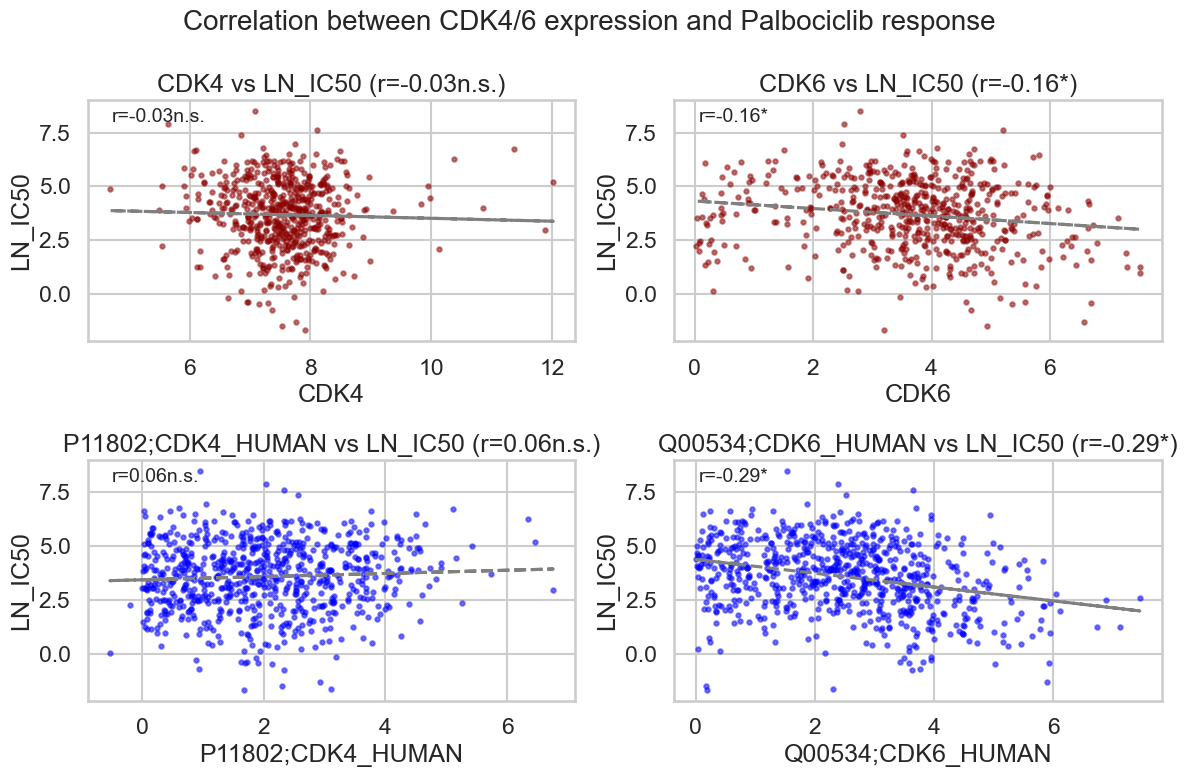

In [6]:
# import external libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# import pearsonr
from scipy.stats import pearsonr

sns.set_style('whitegrid')
sns.set_context('talk')

# create a 2x2 plot 
fig, ax = plt.subplots(2, 2, figsize=(12, 8))


def plot_correlation(df, x_field, y_field, ax,
                     title='', xlabel='', ylabel='',
                      **kwargs):
    """Plot a scatter plot with a line of best fit and correlation coefficient"""
    # plot the scatter plot
    ax.scatter(df[x_field], df[y_field], **kwargs)
    # create line of best fit
    try: 
        m, b = np.polyfit(df[x_field], df[y_field], 1)
    except Exception as e:
        m, b = 0, 0
    ax.plot(df[x_field], m*df[x_field] + b, color='grey', linestyle='--')
    # show correlation coefficient in the title
    # corr = str(round(np.corrcoef(df[x_field], df[y_field])[0, 1], 2))

    corr, pval = pearsonr(df[x_field], df[y_field])
    corr = str(round(corr, 2))
    if pval < 0.05:
        corr = corr + '*'
    else: 
        corr = corr + 'n.s.'
    if title == '':
        ax.set_title(f'{x_field} vs {y_field} (r={corr})')
    else:
        ax.set_title(title)
    
    if xlabel == '':
        ax.set_xlabel(x_field)
    else:
        ax.set_xlabel(xlabel)
    
    if ylabel == '':
        ax.set_ylabel(y_field)
    else:
        ax.set_ylabel(ylabel)
    # add corr as a caption in the plot
    ax.text(0.05, 0.97, f'r={corr}', transform=ax.transAxes, fontsize=14, verticalalignment='top')

    return ax

ax[0,0] = plot_correlation(gene_df, 'CDK4', 'LN_IC50', ax[0,0], color='darkred', alpha=0.5, s=10)
ax[0,1] = plot_correlation(gene_df, 'CDK6', 'LN_IC50', ax[0,1], color='darkred', alpha=0.5, s=10)
ax[1,0] = plot_correlation(data_df, 'P11802;CDK4_HUMAN', 'LN_IC50', ax[1,0], color='blue', alpha=0.5, s=10)
ax[1,1] = plot_correlation(data_df, 'Q00534;CDK6_HUMAN', 'LN_IC50', ax[1,1], color='blue', alpha=0.5, s=10)
# title
fig.suptitle('Correlation between CDK4/6 expression and Palbociclib response', fontsize=20)
plt.tight_layout()
plt.show()

### Correlation of palbociclib sensitivity and top features from proteomic datasets

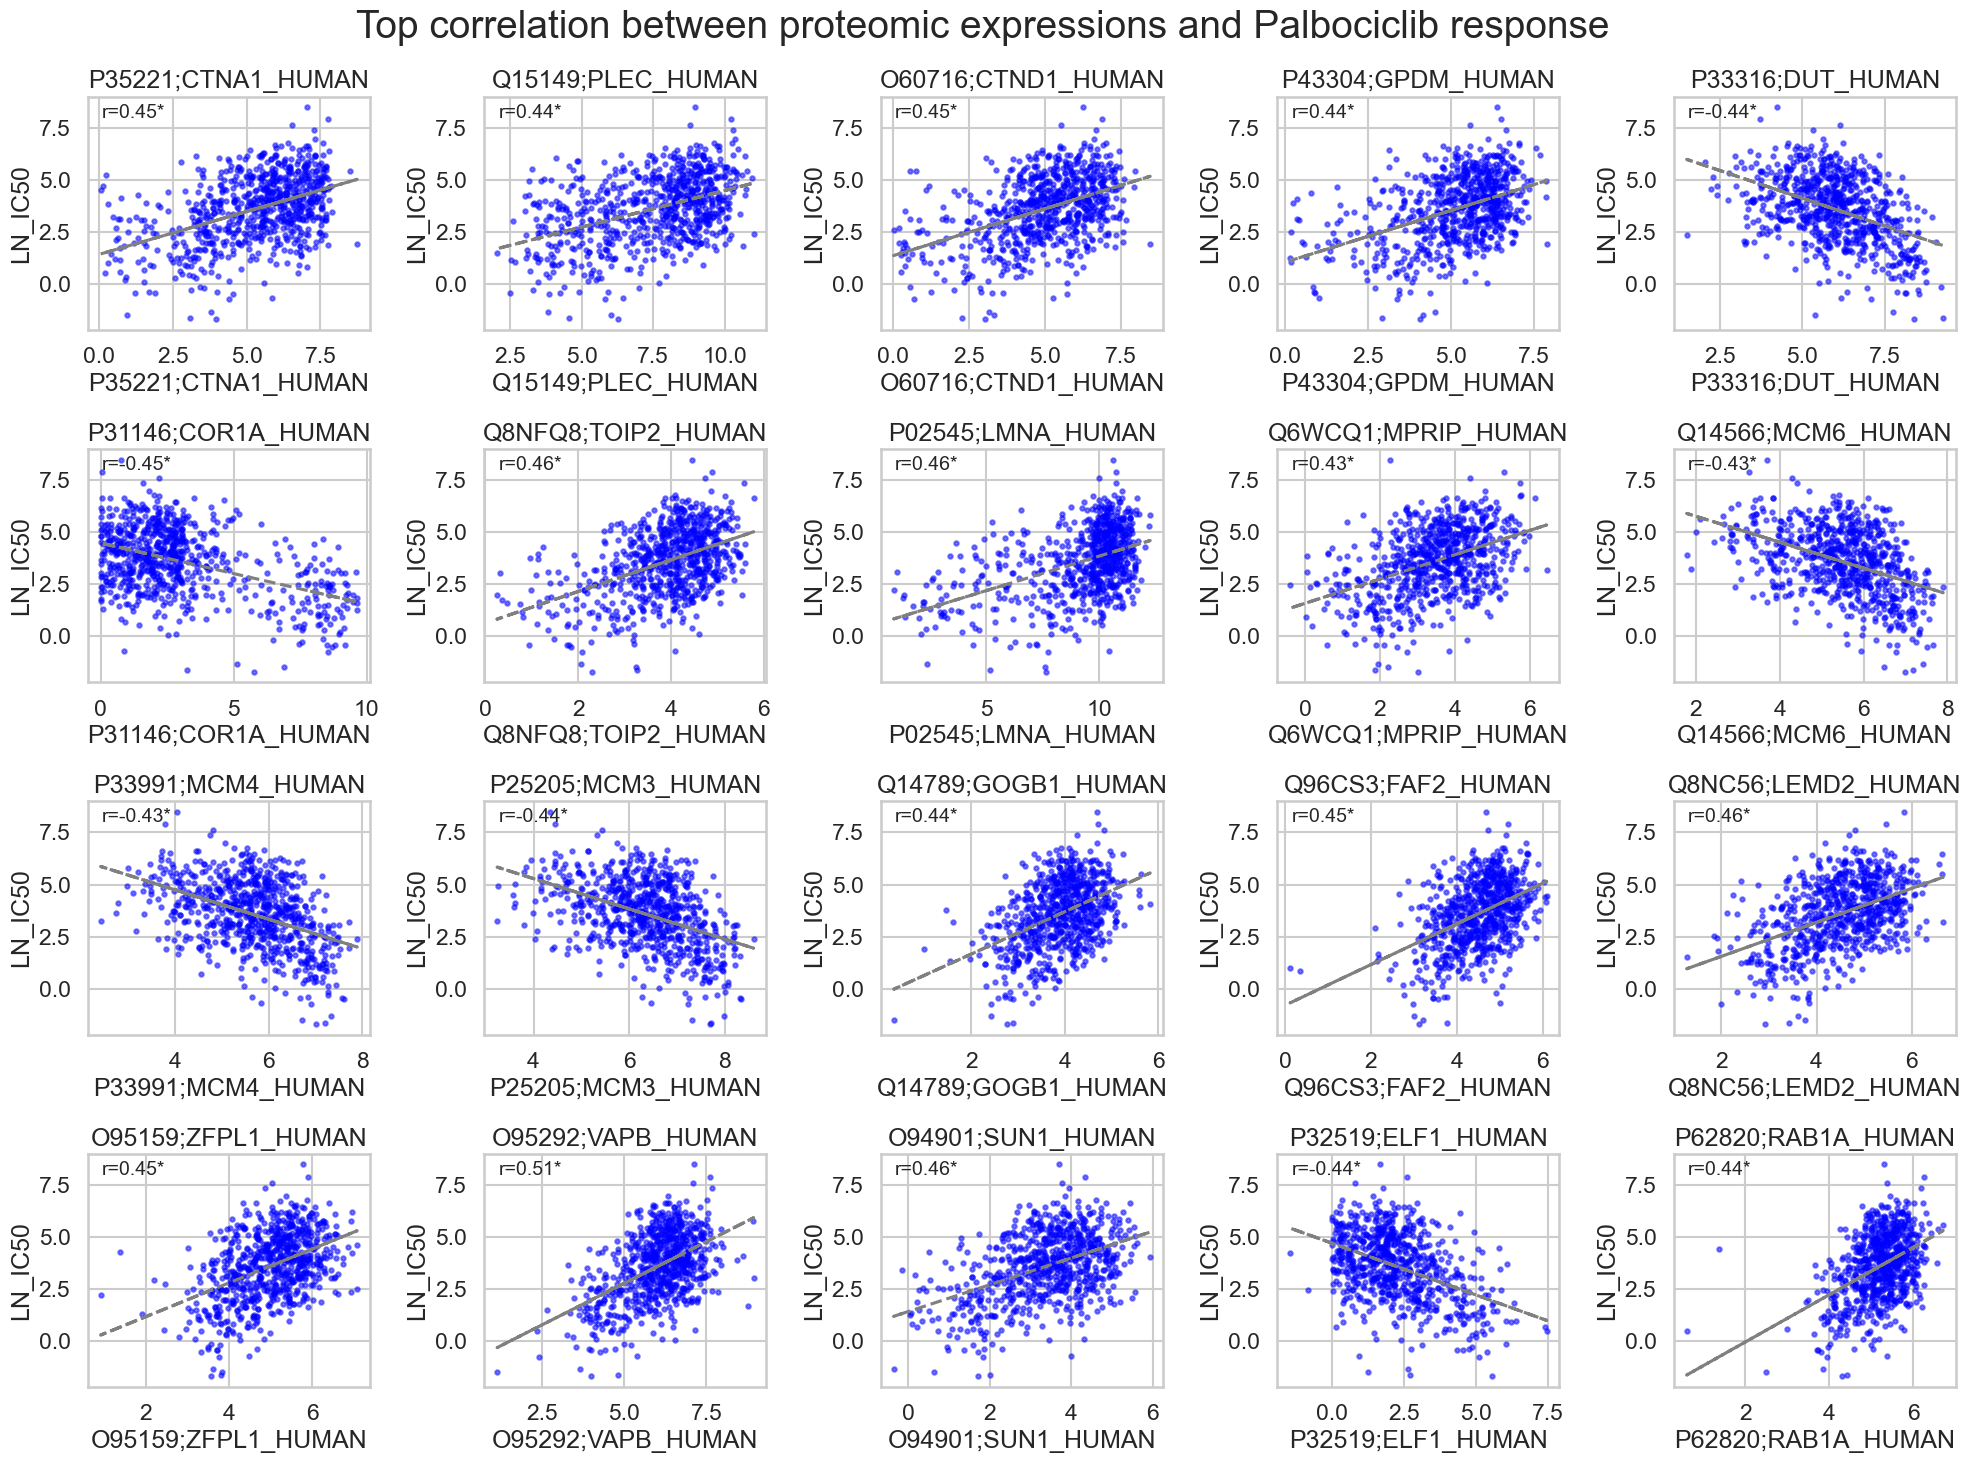

In [7]:
# using f-regression, select the top 20 features

from sklearn.feature_selection import SelectKBest, f_regression

# select the top 20 features
selector = SelectKBest(f_regression, k=20)
selector.fit(feature_data, label_data)

# get the names of the top 20 features return index = true
top_20_features_original = feature_data.columns[selector.get_support(indices=True)]

fig, axes = plt.subplots(4, 5, figsize=(20, 15))
for i, ax in enumerate(axes.flatten()):
    # create a joint dataframe of gene expression and drug response for palbociclib
    # print(top_20_features[i])
    feature = top_20_features_original[i]
    ax = plot_correlation(data_df, feature, 'LN_IC50', ax, title=f'{feature}',
                          color='blue', alpha=0.5, s=10)

fig.suptitle('Top correlation between proteomic expressions and Palbociclib response', fontsize=28)
plt.tight_layout()
plt.show()


### Correlation of palbociclib sensitivity and top features from transcriptomic datasets

In [8]:
# gene_feature_data.replace(0, np.nan, inplace=True)

# # imputer = FirstQuantileImputer()
# # imputer.fit(gene_feature_data)
# # gene_feature_data = imputer.transform(gene_feature_data, return_df=True)

# gene_feature_data.head()

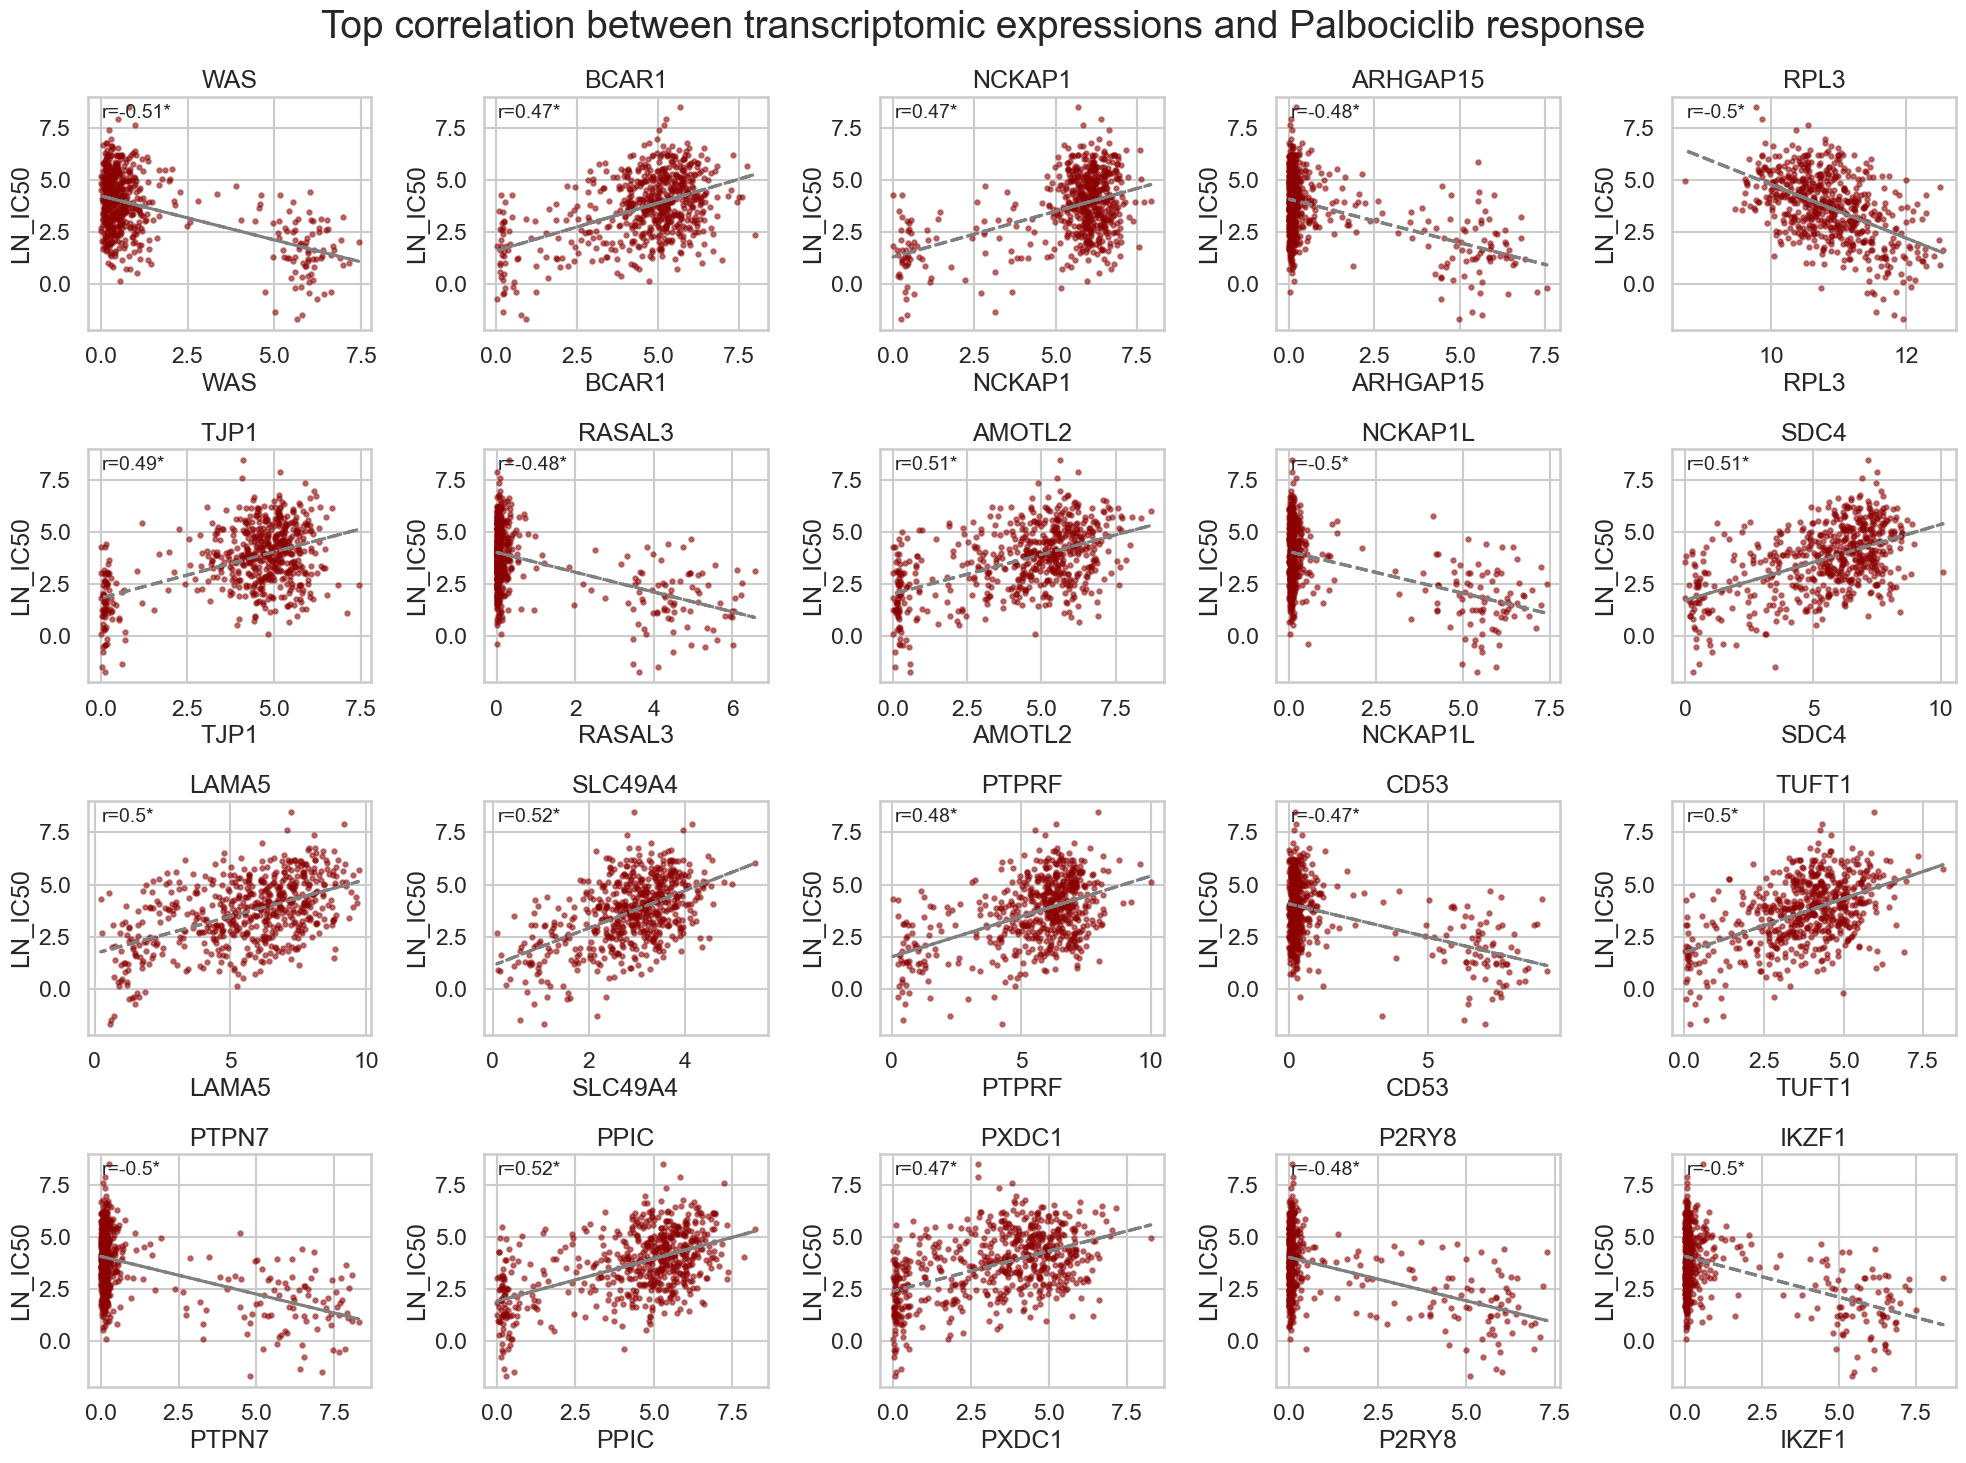

In [9]:
# using f-regression, select the top 20 features

from sklearn.feature_selection import SelectKBest, f_regression


# select the top 20 features
selector = SelectKBest(f_regression, k=20)
selector.fit(gene_feature_data, gene_label_data)

# get the names of the top 20 features return index = true
top_20_features_original = gene_feature_data.columns[selector.get_support(indices=True)]

fig, axes = plt.subplots(4, 5, figsize=(20, 15))
for i, ax in enumerate(axes.flatten()):
    # create a joint dataframe of gene expression and drug response for palbociclib
    # print(top_20_features[i])
    feature = top_20_features_original[i]
    ax = plot_correlation(gene_df, feature, 'LN_IC50', ax, title=f'{feature}',
                          color='darkred', alpha=0.5, s=10)

fig.suptitle('Top correlation between transcriptomic expressions and Palbociclib response', fontsize=28)
plt.tight_layout()
plt.show()


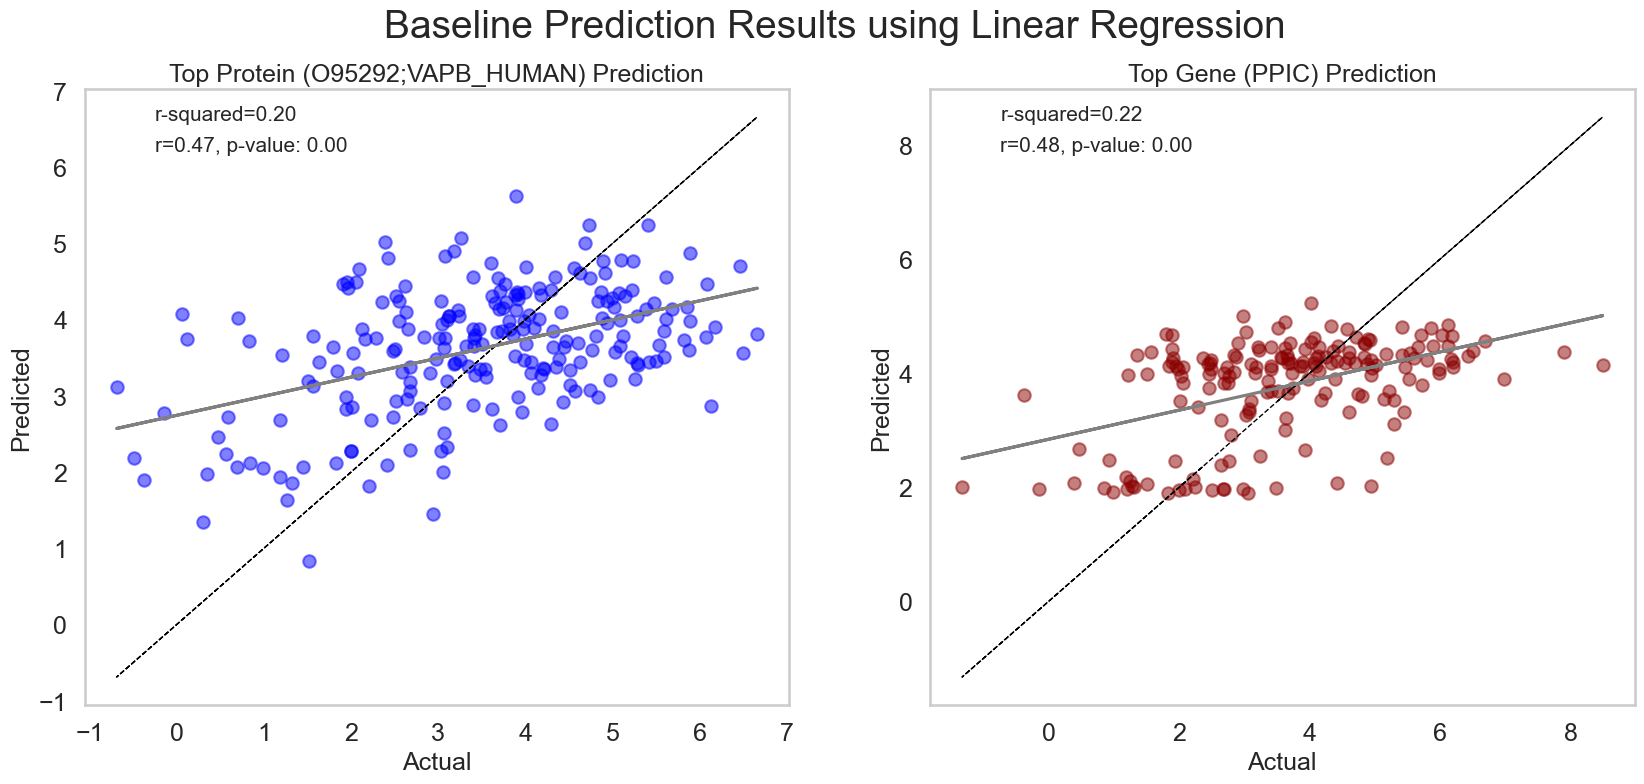

In [10]:
# baseline prediction results, using linear regression with the top correlated feature

from sklearn.linear_model import LinearRegression

# train test split
X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=0.3, random_state=42)
gene_X_train, gene_X_test, gene_y_train, gene_y_test = train_test_split(gene_feature_data, gene_label_data, test_size=0.3, random_state=42)


# select the top 1 features
selector = SelectKBest(f_regression, k=1)
selector.fit(feature_data, label_data)

gene_selector = SelectKBest(f_regression, k=1)
gene_selector.fit(gene_feature_data, gene_label_data)

# get the names of the top 1 features return index = true
top_1_features_original = feature_data.columns[selector.get_support(indices=True)]
gene_top_1_features_original = gene_feature_data.columns[gene_selector.get_support(indices=True)]


# create a linear regression model
lr = LinearRegression()
lr.fit(X_train[top_1_features_original], y_train)

gene_lr = LinearRegression()
gene_lr.fit(gene_X_train[gene_top_1_features_original], gene_y_train)

# predict on the test set
y_pred = lr.predict(X_test[top_1_features_original])
gene_y_pred = gene_lr.predict(gene_X_test[gene_top_1_features_original])

fig, ax = plt.subplots(1, 2, figsize=(20,8))

vis.plot_predictions_vs_actual_values(y_test, y_pred, title=f'Top Protein ({top_1_features_original[0]}) Prediction',
                                      ax=ax[0], 
                                      minitext_size=15,
                                      color='blue',
                                      alpha=0.5)
vis.plot_predictions_vs_actual_values(gene_y_test, gene_y_pred, title=f'Top Gene ({gene_top_1_features_original[0]}) Prediction',
                                      ax=ax[1],
                                      minitext_size=15,
                                      color='darkred',
                                      alpha=0.5)

fig.suptitle('Baseline Prediction Results using Linear Regression', fontsize=28)
plt.show()

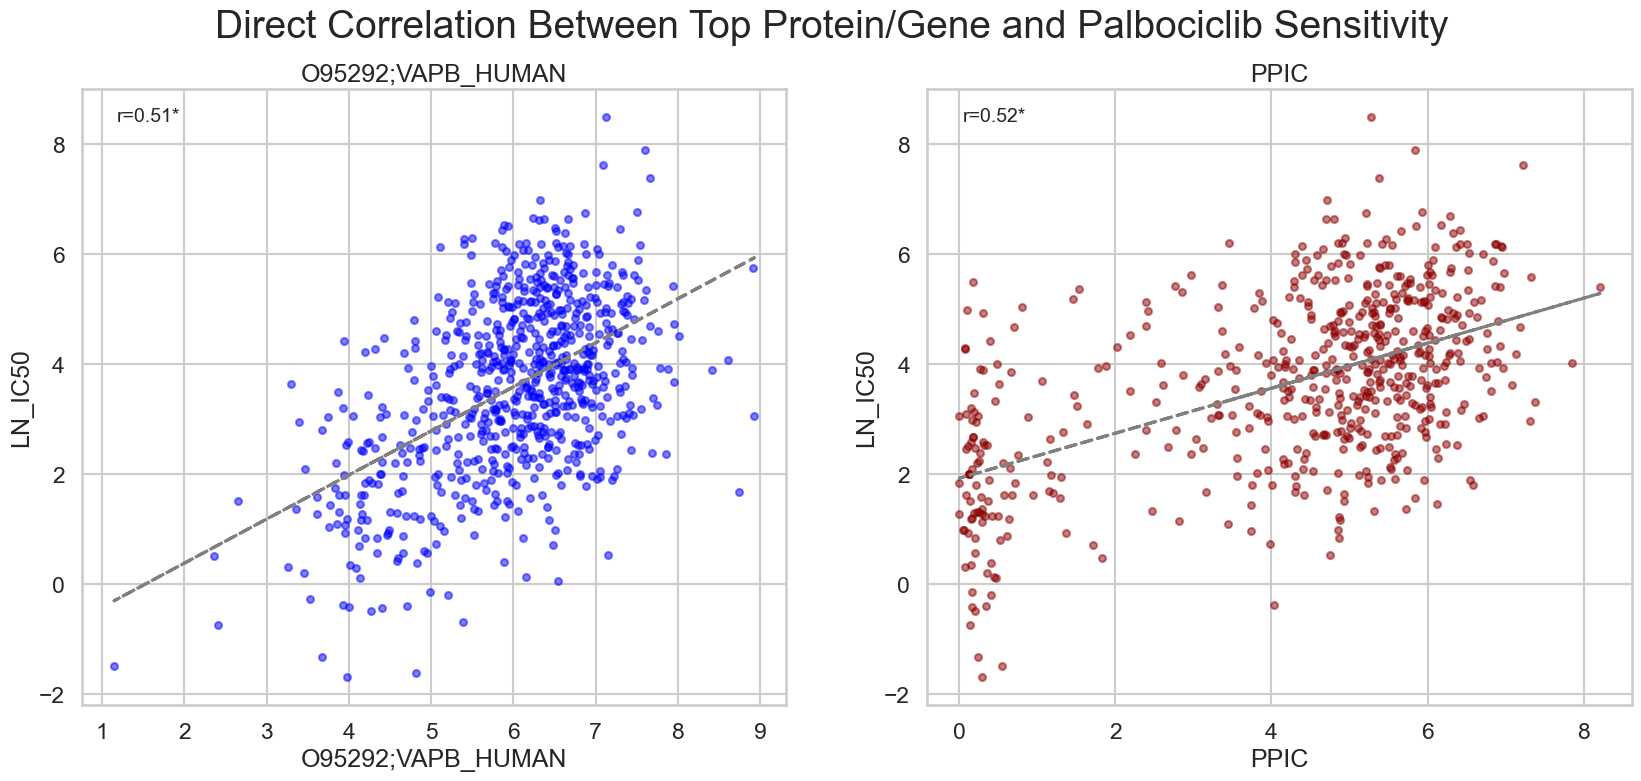

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

ax[0] = plot_correlation(data_df, top_1_features_original[0], 'LN_IC50', ax[0], title=f'{top_1_features_original[0]}',
                            color='blue', alpha=0.5, s=25)

ax[1] = plot_correlation(gene_df, gene_top_1_features_original[0], 'LN_IC50', ax[1], title=f'{gene_top_1_features_original[0]}',
                            color='darkred', alpha=0.5, s=25) 

fig.suptitle('Direct Correlation Between Top Protein/Gene and Palbociclib Sensitivity', fontsize=28)
plt.show()

## 2 Proteomics perform similarly to transcriptomics in predicting palbociclib sensitivity